In [16]:
import pandas as pd 

cadastroFunc_df = pd.read_csv(r'C:\Users\midnightpunk\Documents\Python Impressionador - Hashtag Treinamentos\19.Análise da Dados com o Pandas + Integração Python e Excel\MATERIAL DE APOIO\CadastroFuncionarios.csv', sep=';', decimal=',')
cadastroClie_df = pd.read_csv(r'C:\Users\midnightpunk\Documents\Python Impressionador - Hashtag Treinamentos\19.Análise da Dados com o Pandas + Integração Python e Excel\MATERIAL DE APOIO\CadastroClientes.csv', sep=';')
baseServicos_df = pd.read_excel(r'C:\Users\midnightpunk\Documents\Python Impressionador - Hashtag Treinamentos\19.Análise da Dados com o Pandas + Integração Python e Excel\MATERIAL DE APOIO\BaseServiçosPrestados.xlsx')

cadastroFunc_df = cadastroFunc_df.drop(['Estado Civil', 'Cargo'], axis=1)
display(cadastroFunc_df)

,ID Funcionário,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Area
0,1,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Operações
1,2,João Haddad,5404,2702.0,1080.8,154,574.56,Logística
2,3,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Administrativo
3,4,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Administrativo
4,5,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Administrativo
...,...,...,...,...,...,...,...,...
109,143,Renan Scharnhorst Ott,10793,5396.5,2158.6,242,514.08,Logística
110,144,Lucas Brum Pereira,4048,2024.0,809.6,198,796.32,Comercial
111,148,Caio Stellet,24596,12298.0,4919.2,242,561.12,Administrativo
112,149,Fernanda Rocha,5078,2539.0,1015.6,308,665.28,Comercial


In [20]:
totalFolha_df = cadastroFunc_df['Salario Base'].sum()
totalImposto_df = cadastroFunc_df['Impostos'].sum()
totalBeneficio_df = cadastroFunc_df['Beneficios'].sum()
totalVr_df = cadastroFunc_df['VR'].sum()
totalVt_df = cadastroFunc_df['VT'].sum()
total_funcionario_df = (totalFolha_df + totalImposto_df + totalBeneficio_df + totalVr_df + totalVt_df)
print('O valor total da folha salárial foi de R$ {:_.2f}'.format(total_funcionario_df).replace('.', ',').replace('_', '.'))


O valor total da folha salárial foi de R$ 2.717.493,22


In [21]:
display(cadastroClie_df)

,ID Cliente,Cliente,Valor Contrato Mensal
0,1,Teixeira Gonçalves,540
1,2,Souza Santos,1260
2,3,Emídio Alves,3195
3,4,Santos Costa,2520
4,5,Do Monteiro,3510
...,...,...,...
315,316,Manoel Costa,3690
316,317,Gomes Machado,2385
317,318,Alkindar Cardozo,3510
318,319,Pereira Fazenda,4185


In [22]:
display(baseServicos_df)

,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses)
0,OS0001,67,1,14
1,OS0002,17,2,12
2,OS0003,116,4,14
3,OS0004,37,5,8
4,OS0005,130,6,8
...,...,...,...,...
232,OS0233,111,315,4
233,OS0234,124,316,8
234,OS0235,72,317,6
235,OS0236,90,319,14


In [33]:
faturamento_df = baseServicos_df[['ID Cliente', 'Tempo Total de Contrato (Meses)']].merge(cadastroClie_df[['ID Cliente', 'Valor Contrato Mensal']], on='ID Cliente')
faturamento_df['Faturamento Total'] = faturamento_df['Tempo Total de Contrato (Meses)'] * faturamento_df['Valor Contrato Mensal']
print('O faturamento total é de R$: {:,.2f}'.format(sum(faturamento_df['Faturamento Total'])))

O faturamento total é de R$: 5,519,160.00


In [8]:
funcionario_unico_df = baseServicos_df['ID Funcionário'].unique()
print(len(funcionario_unico_df))


99


In [9]:
funcionario_total_df = cadastroFunc_df['ID Funcionário']
display(len(funcionario_total_df))

114

In [35]:
porcentagem =  (len(funcionario_unico_df) / (len(funcionario_total_df)))
print('O total de funcionários que ja fecharam contratos são de {:.2%}'.format(porcentagem))

O total de funcionários que ja fecharam contratos são de 86.84%


Administrativo    63
Operações         48
Comercial         44
Financeiro        42
Logística         40
Name: Area, dtype: int64


<AxesSubplot:>

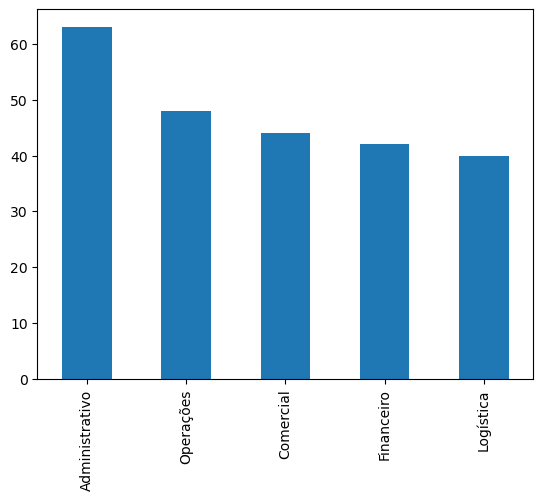

In [54]:
total_contrato_area_df = baseServicos_df[['ID Funcionário']].merge(cadastroFunc_df[['ID Funcionário', 'Area']], on='ID Funcionário')
quanti_contrato_area = total_contrato_area_df['Area'].value_counts()
print(quanti_contrato_area)
quanti_contrato_area.plot(kind='bar')

Administrativo    26
Comercial         26
Operações         23
Logística         21
Financeiro        18
Name: Area, dtype: int64

<AxesSubplot:>

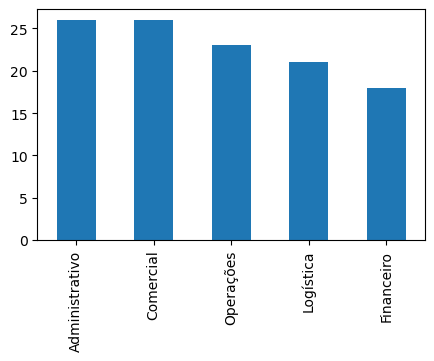

In [62]:
area_funcionarios = cadastroFunc_df['Area'].value_counts()
display(area_funcionarios)
area_funcionarios.plot(figsize=(5, 3), kind='bar')

In [63]:
media_ticket = cadastroClie_df['Valor Contrato Mensal'].mean()
print('Ticket Médio Mensal R$ {:,.2f}'.format(media_ticket))

Ticket Médio Mensal R$ 2,502.56
